In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
df=pd.read_csv("customer_sales.csv")
df.head(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom


In [18]:
df["PurchaseAmount"] = df["Price"] * df["Quantity"]
data = df["PurchaseAmount"].dropna()

In [19]:
df.head(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,PurchaseAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8


In [20]:
data = data[data > 0]

In [21]:
mu = data.mean()
sigma = data.std()
print("Total transactions:", len(data))
print("Mean purchase:", round(mu, 2))
print("Std deviation:", round(sigma, 2))

Total transactions: 1041671
Mean purchase: 20.13
Std deviation: 203.12


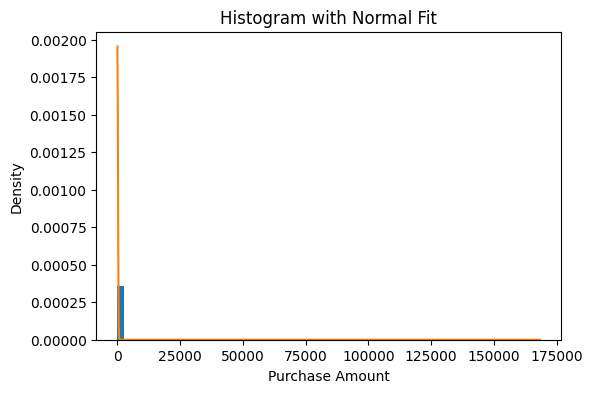

In [26]:
plt.figure(figsize=(6,4))
plt.hist(data, bins=60, density=True)
x = np.linspace(data.min(), data.max(), 1000)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.title("Histogram with Normal Fit")
plt.show()

In [22]:
threshold = 100  #assuming thresshold to be 100
prob_theoretical = 1 - norm.cdf(threshold, mu, sigma)
prob_empirical = np.mean(data > threshold)
print("\nThreshold:", threshold)
print("Theoretical probability:", round(prob_theoretical, 4))
print("Empirical probability:", round(prob_empirical, 4))


Threshold: 100
Theoretical probability: 0.3471
Empirical probability: 0.0259


In [23]:
simulated = np.random.normal(mu, sigma, len(data))

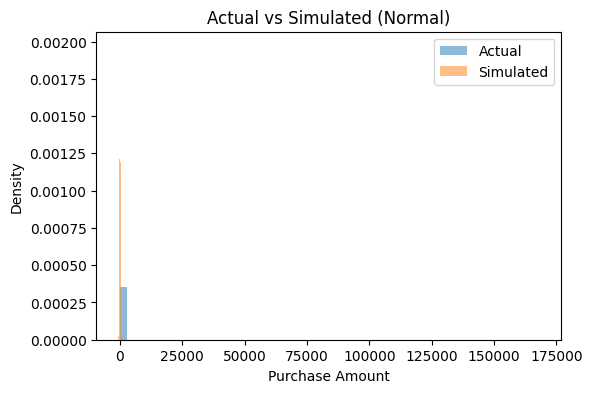

In [24]:
plt.figure(figsize=(6,4))
plt.hist(data, bins=60, density=True, alpha=0.5, label="Actual")
plt.hist(simulated, bins=60, density=True, alpha=0.5, label="Simulated")
plt.legend()
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.title("Actual vs Simulated (Normal)")
plt.show()
